# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *8장 고급 인공 신경망 구현*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 8.1 심층 신경망이 부딪힌 한계 - 사라지는 기울기

### 8.2 심층 신경망 학습의 돌파구 - 연결강도 초기화

### 8.3 활성화 함수의 다양화

### 8.4 최적화 기법 - 경사하강법의 문제와 개선

### 8.5 다양한 최적화 기법 소개

### 8.6 텐서플로우 소개

### 8.7 텐서플로우로 시작하는 Hello world!

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train 데이터의 형태:', x_train.shape)
print('x_train[0] 데이터의 형태:', x_train[0].shape)
print('y_train 데이터의 형태:',y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
x_train 데이터의 형태: (60000, 28, 28)
x_train[0] 데이터의 형태: (28, 28)
y_train 데이터의 형태: (60000,)


In [2]:
num = x_train[0]
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(num[i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

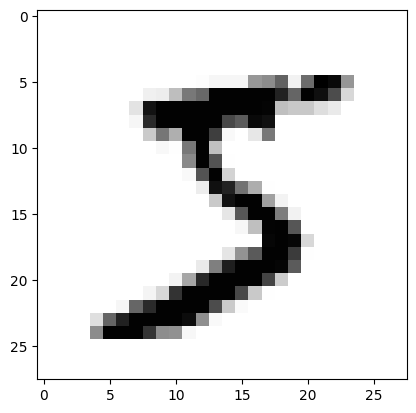

In [3]:
plt.imshow(num, cmap='Greys', interpolation='nearest')

In [4]:
print('y_train[0] =', y_train[0])

y_train[0] = 5


### 8.8 keras로 순차 심층신경망 구축하기

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255, x_test / 255  # 입력값 정규화

model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

# 학습을 위한 최적화 함수, 손실 함수등을 가진 모델을 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 4)

c:\Users\cco1215\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9359 - loss: 0.2215
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9723 - loss: 0.0936
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9810 - loss: 0.0625
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9852 - loss: 0.0454


### 8.9 인공신경망을 최적화 시키자

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

In [7]:
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('test 데이터의 손실값', eval_loss, 'test 데이터의 정확도', eval_acc)

신경망 모델의 학습 결과 :
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.9806 - loss: 0.0666
test 데이터의 손실값 0.06656090170145035 test 데이터의 정확도 0.9805999994277954


### 8.10 소프트맥스 함수와 원-핫 인코딩

In [8]:
import numpy as np

def softmax(a):    
    exp_of_a = np.exp(a)       # 각각의 지수 함수
    sum_exp = np.sum(exp_of_a) # 지수 함수값의 합
    y = exp_of_a / sum_exp
    return y

a = np.array([0.5, 4.1, 2.5, 5.6, 1.2])
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a))

신경망의 예측값 : [0.5 4.1 2.5 5.6 1.2]
소프트맥스 함수의 출력 : [0.00473882 0.17343248 0.03501541 0.77727047 0.00954281]


In [9]:
print('소프트맥스 함수의 최댓값 :', np.max(softmax(a)))

소프트맥스 함수의 최댓값 : 0.7772704668966948


In [10]:
# 소프트맥스 함수의 입력값을 두 배로 증가시켜보자
a = np.array([0.5, 4.1, 2.5, 5.6, 1.2]) * 2
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a))
print('소프트맥스 함수의 최댓값 :', np.max(softmax(a)))

신경망의 예측값 : [ 1.   8.2  5.  11.2  2.4]
소프트맥스 함수의 출력 : [3.53328547e-05 4.73259126e-02 1.92910850e-03 9.50566364e-01
 1.43281791e-04]
소프트맥스 함수의 최댓값 : 0.9505663642857384


### 8.11 원-핫 인코딩과 평균제곱 오차

In [11]:
from keras.utils import to_categorical

data = np.array([0, 1, 2, 3, 4])  # 수치 데이터 0에서 4까지의 값
print('인코딩할 원본 데이터',data)
encoded = to_categorical(data)    # 원-핫 인코딩된 범주형 데이터 생성
print('원-핫 인코딩된 데이터 :')
print(encoded)

인코딩할 원본 데이터 [0 1 2 3 4]
원-핫 인코딩된 데이터 :
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [12]:
import numpy as np

# 정답 3이 인코딩된 target과 신경망의 예측값 y_hat이 있다고 가정하자
target = np.array([0, 0, 0, 1, 0])
y_hat = np.array([0.005, 0.173, 0.035, 0.777, 0.01])

def mse(y, t):   # 평균제곱오차
    return ((y-t)**2).mean()

print('y_hat과 target과의 오차 :', mse(y_hat, target))

y_hat과 target과의 오차 : 0.016201599999999997


In [13]:
# 정답에서 많이 벗어난 other_y_hat 추정치
other_y_hat = np.array([0.2, 0.3, 0.4, 0.01, 0.09])
# other_y_hat 추정치와 정답과의 오차를 알아보자 
print('other_y_hat과 target과의 오차 :', mse( other_y_hat, target ))

other_y_hat과 target과의 오차 : 0.25564


### 8.12 평균제곱 오차와 교차 엔트로피 오차

In [14]:
import numpy as np

def mse(y, t):   # 평균제곱오차
    return ((y-t)**2).mean()
    
# 교차 엔트로피 함수를 에러 함수로 사용해 보도록 하자
def cee(y, t):
   delta = 1e-7
   return -np.sum(t * np.log(y + delta))

t = np.array([0, 0, 1])
y_hat1 = np.array([0.4, 0.05, 0.55])
y_hat2 = np.array([0.9, 0.09, 0.01])

# y_hat 추정치와 정답과의 오차를 알아보자
print('y_hat1과의 cee : {:.2f}'.format(cee(y_hat1, t)))
print('y_hat2과의 cee : {:.2f}'.format(cee(y_hat2, t)))
print('두 값의 비 : {:.2f}'.format(cee(y_hat2, t)/cee(y_hat1, t)))

# y_hat 추정치와 정답과의 오차를 알아보자
print('y_hat1과의 mse : {:.2f}'.format(mse(y_hat1, t)))
print('y_hat2과의 mse : {:.2f}'.format(mse(y_hat2, t)))
print('두 값의 비 : {:.2f}'.format(mse(y_hat2, t)/mse(y_hat1, t)))

y_hat1과의 cee : 0.60
y_hat2과의 cee : 4.61
두 값의 비 : 7.70
y_hat1과의 mse : 0.12
y_hat2과의 mse : 0.60
두 값의 비 : 4.93


### 8.13 정규화와 표준화, 배치 정규화

Text(0, 0.5, 'num of rooms')

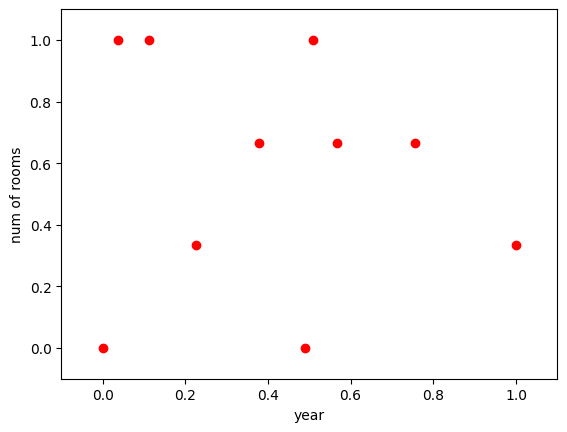

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

yr = np.array([15, 30, 23, 5, 9, 43, 33, 29, 3, 56])
n_rooms = np.array([2, 4, 3, 4, 4, 3, 3, 1, 1, 2])

min_max_scaler = MinMaxScaler()
yr_norm = min_max_scaler.fit_transform(yr[:, np.newaxis])
n_rooms_norm = min_max_scaler.fit_transform(n_rooms[:, np.newaxis])

plt.scatter(yr_norm, n_rooms_norm, c='red')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('year')              
plt.ylabel('num of rooms')

### 8.14 확률적 경사 하강법과 배치 학습

### 8.15 더 깊은 층으로 정확도를 높여보자

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255, x_test / 255  # 입력값 정규화

# 층을 추가한 모델 만들기
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10


c:\Users\cco1215\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9183 - loss: 0.2765 - val_accuracy: 0.9568 - val_loss: 0.1463
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9625 - loss: 0.1215 - val_accuracy: 0.9686 - val_loss: 0.1061
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9720 - loss: 0.0900 - val_accuracy: 0.9674 - val_loss: 0.1046
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9772 - loss: 0.0715 - val_accuracy: 0.9674 - val_loss: 0.1072
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9808 - loss: 0.0608 - val_accuracy: 0.9717 - val_loss: 0.0948
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9838 - loss: 0.0506 - val_accuracy: 0.9719 - val_loss: 0.0955
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9854 - loss: 0.0446 - val_accuracy: 0.9704 - val_loss: 0.0992
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9875 - loss: 0.0396 - val_accurac

In [17]:
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('test 데이터의 손실값', eval_loss, 'test 데이터의 정확도', eval_acc)

신경망 모델의 학습 결과 :
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9739 - loss: 0.1019  
test 데이터의 손실값 0.10189631581306458 test 데이터의 정확도 0.9739000201225281


<Axes: >

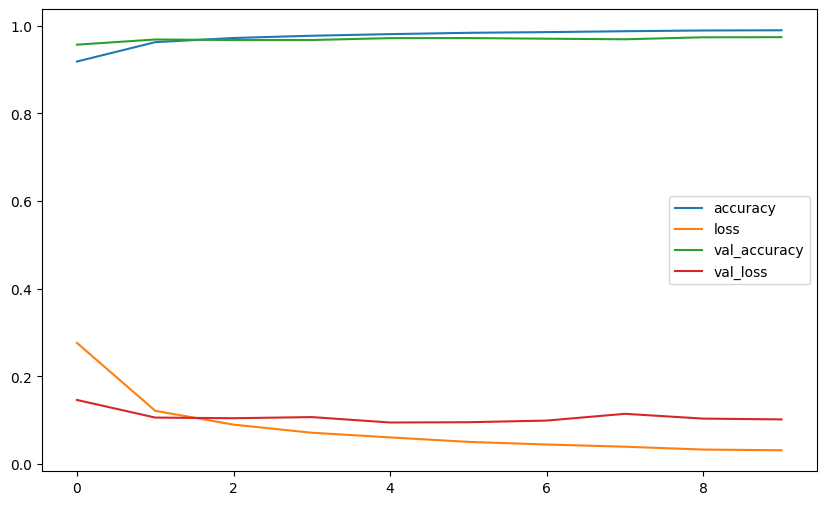

In [18]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 6))

In [19]:
# 더 많은 층을 가진 신경망 모델 만들기
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10


c:\Users\cco1215\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9063 - loss: 0.3006 - val_accuracy: 0.9550 - val_loss: 0.1520
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9591 - loss: 0.1373 - val_accuracy: 0.9597 - val_loss: 0.1356
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9683 - loss: 0.1054 - val_accuracy: 0.9642 - val_loss: 0.1159
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9733 - loss: 0.0885 - val_accuracy: 0.9644 - val_loss: 0.1209
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9766 - loss: 0.0768 - val_accuracy: 0.9680 - val_loss: 0.1192
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9795 - loss: 0.0660 - val_accuracy: 0.9715 - val_loss: 0.1014
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9823 - loss: 0.0580 - val_accuracy: 0.9708 - val_loss: 0.1137
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9830 - loss: 0.0562 - val_accurac

In [20]:
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('test 데이터의 손실값', eval_loss, 'test 데이터의 정확도', eval_acc)

신경망 모델의 학습 결과 :
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.9718 - loss: 0.1055
test 데이터의 손실값 0.10550999641418457 test 데이터의 정확도 0.9718000292778015


<Axes: >

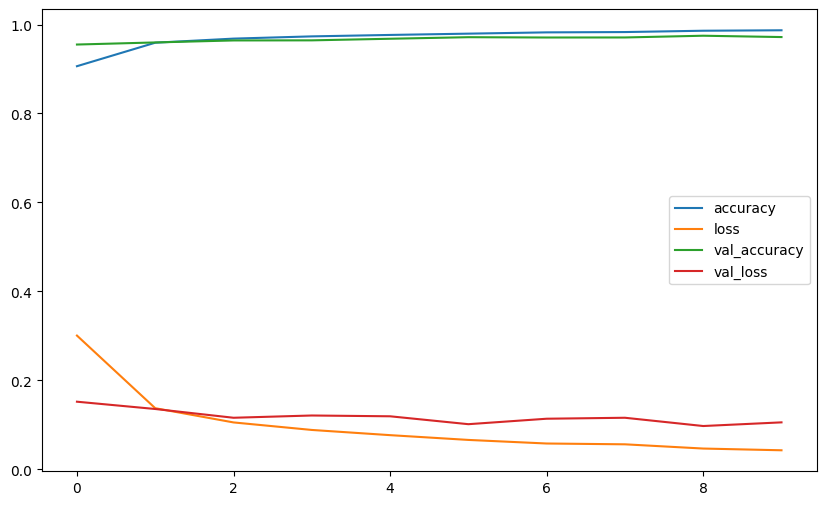

In [21]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 6))

### 8.16 학습데이터에만 최적화된 신경망 개선하기 : 드롭아웃

In [22]:
data = np.arange(1, 11).reshape(2, 5).astype(np.float32)
print(data)

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]


In [23]:
layer = tf.keras.layers.Dropout(.3, input_shape = (2, ))
outputs = layer(data, training=True)
print(outputs)

tf.Tensor(
[[ 0.        0.        4.285714  0.        0.      ]
 [ 8.571428  0.        0.        0.       14.285715]], shape=(2, 5), dtype=float32)


c:\Users\cco1215\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255, x_test / 255  # 입력값 정규화

# 드롭아웃 계층을 가진 신경망 모델 만들기
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))
'''
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation= 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= 'softmax'),
])
# 이전 모델과 동일한 하이퍼파라미터로 컴파일하고 피팅함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10)
'''

c:\Users\cco1215\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7860 - loss: 0.6923 - val_accuracy: 0.9393 - val_loss: 0.2250
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9059 - loss: 0.3603 - val_accuracy: 0.9476 - val_loss: 0.1901
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9216 - loss: 0.3070 - val_accuracy: 0.9541 - val_loss: 0.1683
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9289 - loss: 0.2782 - val_accuracy: 0.9605 - val_loss: 0.1485
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9339 - loss: 0.2577 - val_accuracy: 0.9616 - val_loss: 0.1445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9359 - loss: 0.2469 - val_accuracy: 0.9601 - val_loss: 0.1446
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9397 - loss: 0.2328 - val_accuracy: 0.9644 - val_loss: 0.1329
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9409 - loss: 0.2242 - 

"\nmodel = keras.models.Sequential( [\n    keras.layers.Flatten(input_shape = (28, 28)),\n    keras.layers.Dropout(0.2),\n    keras.layers.Dense(256, activation= 'relu'),\n    keras.layers.Dropout(0.2),\n    keras.layers.Dense(10, activation= 'softmax'),\n])\n# 이전 모델과 동일한 하이퍼파라미터로 컴파일하고 피팅함\nmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])\nmodel.fit(x_train, y_train, epochs = 10)\n"

드롭아웃 노드를 가진 다층 신경망 모델의 학습 결과 :
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.9662 - loss: 0.1354
[0.13542363047599792, 0.9661999940872192]


<Axes: >

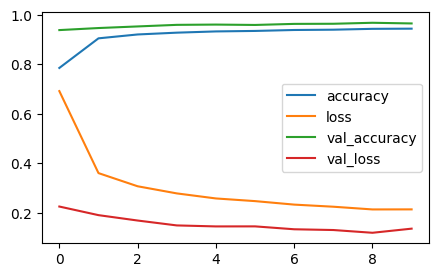

In [25]:
print('드롭아웃 노드를 가진 다층 신경망 모델의 학습 결과 :')
print(model.evaluate(x_test, y_test))

import pandas as pd
pd.DataFrame(history.history).plot(figsize = (5, 3))

### LAB 8-1: Fashion-MNIST 데이터 분류하기

In [26]:
# tensorflow와 tf.keras를 임포트한다
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
print(train_images.shape)  # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


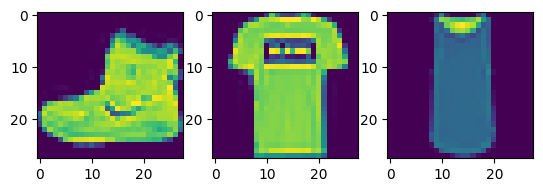

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(train_images[0])       # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1])       # 두 번째 훈련용 데이터
ax3.imshow(train_images[2])       # 세 번째 훈련용 데이터
plt.show()

In [30]:
print(train_labels[:3])

[9 0 0]


In [31]:
# 0-255 구간의 픽셀을 정규화한다
train_images, test_images = train_images / 255, test_images / 255
# 순차 심층 신경망 모델을 만들자
model = keras.models.Sequential( [
   keras.layers.Flatten(input_shape=(28, 28)),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(128, activation= 'relu'),
   keras.layers.Dense(32, activation= 'relu'),
   keras.layers.Dense(10, activation= 'softmax'),
])

c:\Users\cco1215\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=64,
                    epochs=10, validation_split=0.25)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7948 - loss: 0.5866 - val_accuracy: 0.8469 - val_loss: 0.4322
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8430 - loss: 0.4374 - val_accuracy: 0.8526 - val_loss: 0.4067
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8553 - loss: 0.3980 - val_accuracy: 0.8604 - val_loss: 0.3888
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8624 - loss: 0.3734 - val_accuracy: 0.8676 - val_loss: 0.3624
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8690 - loss: 0.3535 - val_accuracy: 0.8718 - val_loss: 0.3579
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8709 - loss: 0.3444 - val_accuracy: 0.8775 - val_loss: 0.3379
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8762 - loss: 0.3304 - val_accuracy: 0.8803 - val_loss: 0.3318
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8808 - loss: 0.3201 - val_accuracy: 0.

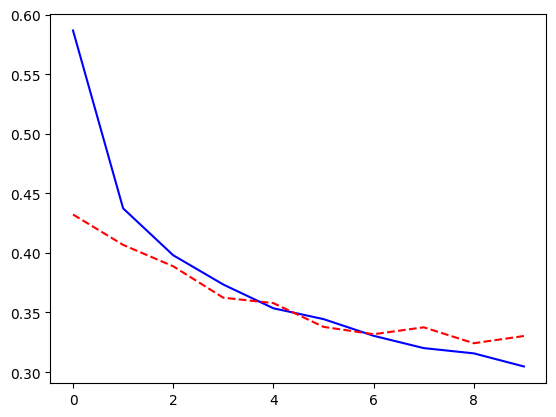

In [33]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')

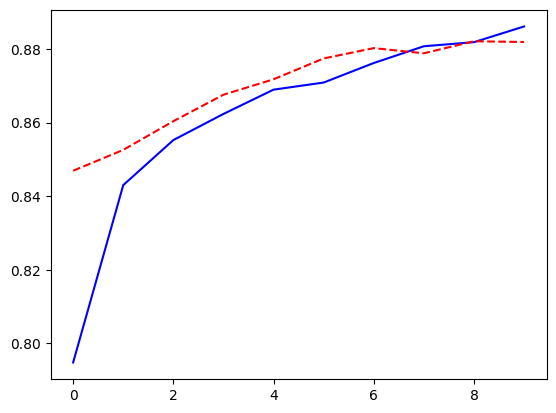

In [34]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')

In [35]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 0s - 966us/step - accuracy: 0.8723 - loss: 0.3579
테스트 정확도: 0.8723000288009644


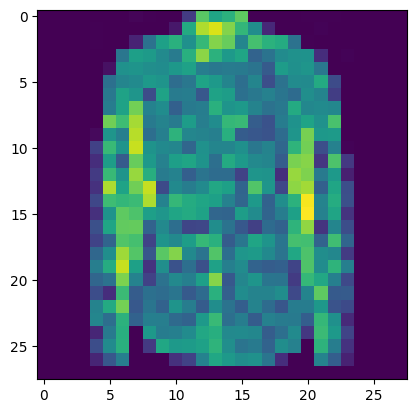

In [36]:
randIdx = np.random.randint(0, 1000)
plt.imshow(test_images[randIdx])

In [37]:
print(test_images[randIdx].shape)
new_image = test_images[randIdx][np.newaxis, :, :]
print(new_image.shape)

yhat = model.predict(new_image)
print(yhat.round(3))    # 소수점 아래 세 자리 정확도로 살펴보자

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.    0.    0.008 0.    0.065 0.    0.927 0.    0.    0.   ]]


In [38]:
yhat = np.argmax( model.predict( test_images[randIdx][np.newaxis, :, :]) )
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


np.int64(6)

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [40]:
print(class_names[yhat])

Shirt


In [41]:
def plot_images(images, labels, images_per_row=5):
  n_images = len(images)
  n_rows = (n_images-1) // images_per_row + 1
  fig, ax = plt.subplots(n_rows, images_per_row, 
                         figsize = (images_per_row * 2, n_rows * 2))
  for i in range(n_rows):
      for j in range(images_per_row):
          if i*images_per_row + j >= n_images: break
          img_idx = i*images_per_row + j
          a_image = images[img_idx].reshape(28,28)
          if n_rows>1: axis = ax[i, j]
          else: axis = ax[j]
          axis.get_xaxis().set_visible(False)
          axis.get_yaxis().set_visible(False)
          label = class_names[labels[img_idx]]
          axis.set_title(label)
          axis.imshow(a_image, interpolation='nearest')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 2 8 0 2 5 7 9 1]


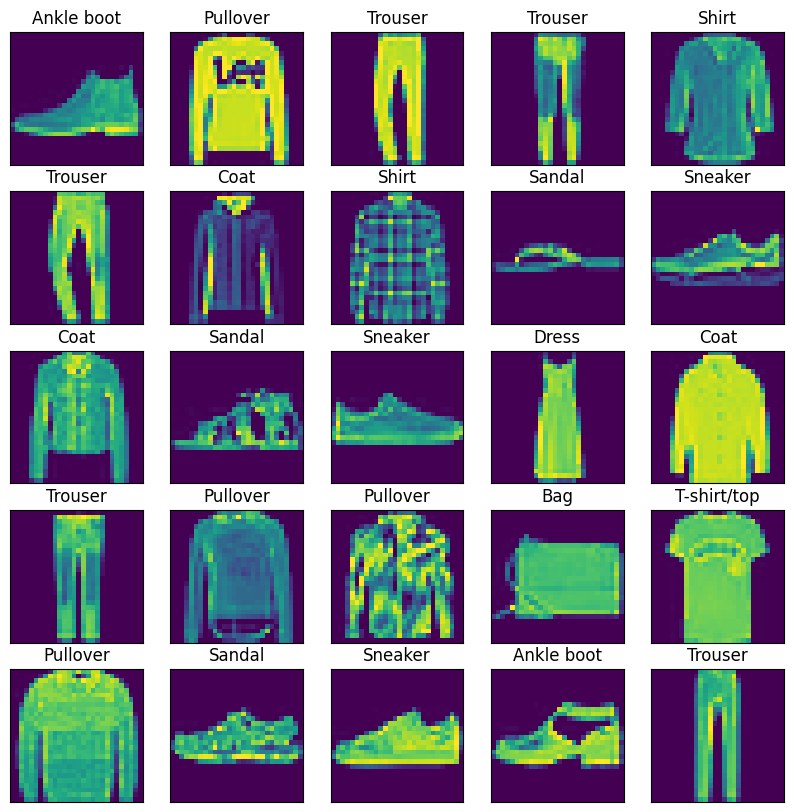

: 

In [ ]:
images = test_images[:25]
predictions = np.argmax(model.predict(images), axis=1)
print(predictions)
plot_images(images, predictions, images_per_row = 5)

### 수고하셨습니다.